In [3]:
import mujoco
import time 
import numpy as np
import mediapy as media
import matplotlib.pyplot as plt

# More legible printing from numpy.
np.set_printoptions(precision=3, suppress=True, linewidth=100)

from IPython.display import clear_output
clear_output()


In [5]:
xml = """
<mujoco>
    <worldbody>
        <geom name="floor" pos="0 0 0" size="1 1 0.1" type="plane" rgba=".5 .5 .5 1"/>
        <geom name="box" pos="0 0 0.5" size="0.1 0.1 0.1" type="box" rgba="1 0 0 1"/>
        <geom name="ball" pos="0 0 1" size="0.1" type="sphere" rgba="0 1 0 1"/>
    </worldbody>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(xml)

In [9]:
print(model.ngeom)
print(model.nbody)
print(model.geom_rgba)

3
1
[[0.5 0.5 0.5 1. ]
 [1.  0.  0.  1. ]
 [0.  1.  0.  1. ]]


In [10]:
model.geom()

KeyError: "Invalid name ''. Valid names: ['ball', 'box', 'floor']"

In [11]:
model.geom('ball')

<_MjModelGeomViews
  bodyid: array([0], dtype=int32)
  conaffinity: array([1], dtype=int32)
  condim: array([3], dtype=int32)
  contype: array([1], dtype=int32)
  dataid: array([-1], dtype=int32)
  friction: array([1.   , 0.005, 0.   ])
  gap: array([0.])
  group: array([0], dtype=int32)
  id: 2
  margin: array([0.])
  matid: array([-1], dtype=int32)
  name: 'ball'
  pos: array([0., 0., 1.])
  priority: array([0], dtype=int32)
  quat: array([1., 0., 0., 0.])
  rbound: array([0.1])
  rgba: array([0., 1., 0., 1.], dtype=float32)
  sameframe: array([3], dtype=uint8)
  size: array([0.1, 0. , 0. ])
  solimp: array([0.9  , 0.95 , 0.001, 0.5  , 2.   ])
  solmix: array([1.])
  solref: array([0.02, 1.  ])
  type: array([2], dtype=int32)
  user: array([], dtype=float64)
>

In [12]:
model.geom("ball").rgba

array([0., 1., 0., 1.], dtype=float32)

In [17]:
id = mujoco.mj_name2id(model, mujoco.mjtObj.mjOBJ_GEOM, "ball")
print(model.geom_rgba[id,:])
print(id)

[0. 1. 0. 1.]
2


In [18]:
print('id of ball: ', model.geom('ball').id)
print('name of geom 2: ', model.geom(2).name)
print('name of geom 0: ', model.body(0).name)

id of ball:  2
name of geom 2:  ball
name of geom 0:  world


In [19]:
[model.geom(i).name for i in range(model.ngeom)]

['floor', 'box', 'ball']

In [20]:
data = mujoco.MjData(model)

In [21]:
print(data.geom_xpos)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [22]:
mujoco.mj_kinematics(model,data)
print("raw access:\n", data.geom_xpos)
print("\nnamed access:\n", data.geom('ball').xpos)


raw access:
 [[0.  0.  0. ]
 [0.  0.  0.5]
 [0.  0.  1. ]]

named access:
 [0. 0. 1.]


""

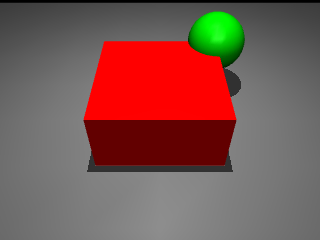

In [25]:
xml = """
<mujoco>
  <worldbody>
    <light name="top_light" pos="0 0 2"/>
    <geom name="floor" type="plane" size="1 1 0.1" rgba=".5 .5 .5 1"/>
    <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
    <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
  </worldbody>
</mujoco>
"""

model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)

with mujoco.Renderer(model) as renderer:
    mujoco.mj_forward(model, data)
    renderer.update_scene(data)
    media.show_image(renderer.render())

""

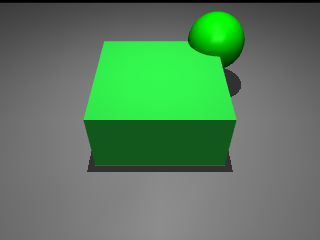

In [29]:
model.geom('red_box').rgba[:3] = np.random.rand(3)
with mujoco.Renderer(model) as renderer:
    renderer.update_scene(data)
    media.show_image(renderer.render())

In [30]:
duration = 4
framerate = 60

frames = []
mujoco.mj_resetData(model, data)
with mujoco.Renderer(model) as renderer:
    while data.time < duration:
        mujoco.mj_step(model, data)
        if len(frames) < data.time * framerate:
            renderer.update_scene(data)
            pixels = renderer.render()
            frames.append(pixels)
media.show_video(frames, fps=framerate)

In [41]:
xml = """
<mujoco>
  <worldbody>
    <light name="top_light" pos="0 0 2"/>
    <body name="box_n_ball" euler="0 0 -30">
        <joint name="swing" type="hinge" axis="1 -1 0" pos="-.2 -.2 -.2"/>
        <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
        <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
    </body>
  </worldbody>
</mujoco>
"""

model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)

# turn on joint visualization
scene_option = mujoco.MjvOption()
scene_option.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = True

duration = 4
framerate = 60

frames = []
mujoco.mj_resetData(model, data)

with mujoco.Renderer(model) as renderer:
    while data.time < duration:
        mujoco.mj_step(model, data)
        if len(frames) < data.time * framerate:
            renderer.update_scene(data, scene_option=scene_option)
            pixels = renderer.render()
            frames.append(pixels)
media.show_video(frames, fps=framerate)

In [38]:
model.opt.timestep

0.002

In [43]:
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)
print('default gravity: ', model.opt.gravity)
model.opt.gravity = [0, 0, 9.81]
print('fliped gravity: ', model.opt.gravity)

frames =[]
mujoco.mj_resetData(model, data)
with mujoco.Renderer(model) as renderer:
    while data.time < duration:
        mujoco.mj_step(model, data)
        if len(frames) < data.time * framerate:
            renderer.update_scene(data, scene_option=scene_option)
            pixels = renderer.render()
            frames.append(pixels)
media.show_video(frames, fps=framerate)

default gravity:  [ 0.    0.   -9.81]
fliped gravity:  [0.   0.   9.81]


In [44]:
print('DOF in model: ', model.nv)
print('generalized positions: ', data.qpos)
print('generalized velocities: ', data.qvel)

DOF in model:  1
generalized positions:  [0.716]
generalized velocities:  [-4.127]


## Simulating free bodies with the self-inverting "tippe-top"

positions [0.   0.   0.02 1.   0.   0.   0.  ]
velocities [0. 0. 0. 0. 0. 0.]


positions [0.   0.   0.02 1.   0.   0.   0.  ]
velocities [0. 0. 0. 0. 0. 0.]


""

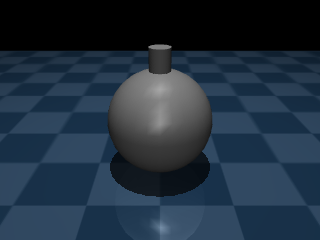

In [57]:
model = mujoco.MjModel.from_xml_path('tippe_top.xml')
data = mujoco.MjData(model)

mujoco.mj_forward(model, data)
with mujoco.Renderer(model) as renderer:
    renderer.update_scene(data, camera="closeup")
    
    media.show_image(renderer.render())

print('positions', data.qpos)
print('velocities', data.qvel)

In [59]:
duration = 7
framerate = 60

frames = []
mujoco.mj_resetDataKeyframe(model,data, 0)
with mujoco.Renderer(model) as renderer:
    while data.time < duration:
        mujoco.mj_step(model, data)
        if len(frames) < data.time * framerate:
            renderer.update_scene(data, camera="closeup")
            pixels = renderer.render()
            frames.append(pixels)
media.show_video(frames, fps=framerate)

Text(0, 0.5, 'm')

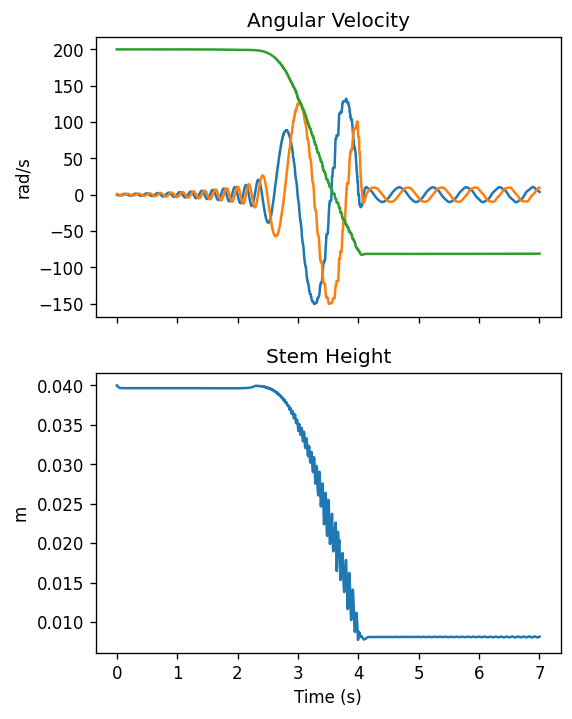

In [64]:
timevals = []
angular_vel = []
stem_height = []

mujoco.mj_resetDataKeyframe(model, data, 0)
while data.time < duration:
    mujoco.mj_step(model, data)
    timevals.append(data.time)
    angular_vel.append(data.qvel[3:6].copy())
    stem_height.append(data.geom_xpos[2,2])

dpi = 120
width = 600
height = 800
figsize = (width / dpi, height / dpi)
_, ax = plt.subplots(2, 1, figsize=figsize, dpi=dpi, sharex=True)
ax[0].plot(timevals, angular_vel)
ax[0].set_title('Angular Velocity')
ax[0].set_ylabel('rad/s')

ax[1].plot(timevals, stem_height)
ax[1].set_title('Stem Height')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('m')

# _ = ax[1].set_title('stem height')